### Problem 1

a) Code the Conjugate Gradient Method and apply it to solve a simple $$Hx=b$$ system, with H’s dimension as 10×10.

In [1]:
import numpy as np

# Threshhold for the gradient for termination
epsilon_threshhold = 0.001

def conjugate_gradient(H,b,initial_point = np.array([[3],[1]])):

    x_k = initial_point
    # Compute gradient
    r_k = np.matmul(H,initial_point) - b
    # Descent Direction
    p_k = -r_k
    
    iterations = 0
    while np.linalg.norm(r_k) > epsilon_threshhold:
        
        # Calculate the exact step length to take in the descent direction
        a_k_num = -np.matmul(r_k.T,p_k)
        a_k_denom = np.matmul(p_k.T,np.matmul(H,p_k))
        a_k = a_k_num / a_k_denom

        # Perform Descent
        x_k = x_k + a_k*p_k

        # Compute the gradient at the newly arrived point
        r_k = np.matmul(H,x_k) - b

        # Calculating beta_k such that p_(k-1) and p_k are conjguate with respect to H
        b_k_num = np.matmul(p_k.T,np.matmul(H,r_k))
        b_k_denom = np.matmul(p_k.T,np.matmul(H,p_k))
        b_k = b_k_num / b_k_denom

        # The new Conjugate Descent Direction
        p_k = -r_k + b_k*p_k
        iterations+=1
        
    return iterations,x_k

In [5]:
# H (10*10 Matrix)
H = np.array([ [27,    4,    -4,   -12,    -3,    -3,     6,   -13,     5,     9],
               [4,    12,     5,    -7,    -7,    -8,    -8,    -9,     3,    -2,],
               [-4,    5,    18,     3,    -6,    -7,     3,     6,    -1,     3],
               [-12,  -7,     3,    22,     6,     6,     1,    10,    -2,   -15],
               [-3,   -7,    -6,     6,    23,     4,     7,    12,    -7,    -1],
               [-3,   -8,    -7,     6,     4,    20,     5,     1,     0,    -3],
               [6,    -8,     3,     1,     7,     5,    22,     2,    -5,    10],
               [-13,  -9,     6,    10,    12,     1,     2,    27,    -8,     3],
               [5,     3,    -1,    -2,    -7,     0,    -5,    -8,    14,    -2],
               [9,    -2,     3,   -15,    -1,    -3,    10,     3,    -2,    25]])


b = np.array([ [-67],[-264],[27],[199],[323],[218],[316],[356],[-121],[120]])
initial_point = np.zeros((10,1))
iterations, ans = conjugate_gradient(H,b,initial_point)

lib_ans = np.linalg.solve(H,b)

print("Solution returned by Conjugate Gradient custom implementation")
print("--------")
print(str(ans))
print("\nSolution returned by numpy.linalg.solve")
print("--------")
print(str(lib_ans))

Solution returned by Conjugate Gradient custom implementation
--------
[[ 1.99999995e+00]
 [-3.11658335e-08]
 [ 1.00000000e+00]
 [ 5.00000005e+00]
 [ 6.00000004e+00]
 [ 7.00000002e+00]
 [ 8.00000001e+00]
 [ 9.00000006e+00]
 [ 2.99999998e+00]
 [ 3.99999998e+00]]

Solution returned by numpy.linalg.solve
--------
[[2.00000000e+00]
 [1.39481464e-12]
 [1.00000000e+00]
 [5.00000000e+00]
 [6.00000000e+00]
 [7.00000000e+00]
 [8.00000000e+00]
 [9.00000000e+00]
 [3.00000000e+00]
 [4.00000000e+00]]


b) Construct  matrices  with  various  eigenvalue  distributions  (clustered  and  non-clustered)and apply the above CG method to them.  Comment on the behaviour of the CG method in terms of convergence.

### Question 2

 Your start-up will face the cash requirements shown in Table 1 in the next eight quarters(positive entries represent cash needs while negative entries represent cash surpluses).The company has three borrowing possibilities.

|   Q1	|   Q2	|  Q3 	|   Q4	|   Q5	| Q6  | Q7 | Q8 |  
|---	|---	|---	|---	|---	|---  |--- |--- |
|   100	|   500	|  100 	|  -600 	|  -500 	|  200  | 600   | -900   |

- a 2-year loan available at the beginning of Q1, with a 1% interest per quarter.
- The other two borrowing opportunities are available at the beginning of every quarter: a 6-monthloan with a 1.8% interest per quarter, and a quarterly loan with a 2.5% interest for the quarter.

a)  Write a program that implements the revised simplex algorithm.


In [16]:
import numpy as np
def revised_simplex_method(A,b,c,b_vars,nb_vars):

    final_ans = np.zeros((len(b_vars)+len(nb_vars),))
    iterations = 0
    while True:
        
        print("Basic Variables bef =" + str(b_vars))
        print("Non Basic Variables bef = " + str(nb_vars))

        B = A[:,b_vars]
        N = A[:,nb_vars]
        c_B = c[b_vars,:]
        c_N = c[nb_vars,:]

        print(B.shape)
        print(b.shape)
        x_B = np.linalg.solve(B,b)
        lambda_ = np.linalg.solve(B.T,c_B)
        s_N =c_N - np.matmul(N.T,lambda_)

        print("x_B = " + str(x_B) )
        print("lambda = " + str(lambda_))
        print("s_N = " + str(s_N))

        if np.all(s_N>=0) :
            final_ans[b_vars] = x_B.squeeze(1)
            return True,final_ans

        q = int(np.argmin(s_N,axis=0))
        A_q = np.expand_dims(A[:,nb_vars[q]],axis=1)
        d = np.linalg.solve(B,A_q)

        print("q = " + str(q))
        print("d = " + str(d))

        if np.all(d<=0):
            print("Feasible Region Unbounded")
            return False,np.zeros((len(b_vars)+len(nb_vars),)) 

        x_q = np.inf
        p = x_B.shape[0]
        d_positive = d>0
        for i in range(x_B.shape[0]):
            if d_positive[i,0]:
                ratio = x_B[i,0] / d[i,0]
                if ratio < x_q:
                    x_q = ratio
                    p = i
        
        tmp = b_vars[p]
        b_vars[p] = nb_vars[q]
        nb_vars[q] = tmp

        b_vars.sort()
        nb_vars.sort()

        print("Basic Variables = " + str(b_vars))
        print("Non Basic Variables = " + str(nb_vars))
        print("---------")



In [17]:
def find_initial_point(A,b,c):
    
    e = np.zeros((A.shape[1]+A.shape[0],1))
    e[A.shape[1]:,:] = 1
    print(e)
    A_new = np.zeros((A.shape[0],A.shape[1]+A.shape[0]))
    A_new[:A.shape[0],:A.shape[1]] = A.copy()

    for i in range(b.shape[0]):
        if b[i,0] < 0:
            A_new[i,A.shape[1]+i] = -1
        else:
            A_new[i,A.shape[1]+i] = 1
    print(A_new)
    
    b_vars = [ i for i in range(A.shape[1],A.shape[1]+A.shape[0]) ]
    nb_vars = [ i for i in range(A.shape[1])]
    flag,solution = revised_simplex_method(A_new,b,e,b_vars,nb_vars)
    return flag,solution
    
    

In [49]:
'''A = np.array([[1,1,1,0],[2,0.5,0,1]])
b = np.array([[5],[8]])
c = np.array([[-4],[-2],[0],[0]])'''

'''A = np.array([[10,20,1,0],[8,8,0,1]])
b = np.array([[120],[80]])
c = np.array([[-12],[-16],[0],[0]])'''
'''
A = np.array([[1,1,-1,0,0],[1,-1,0,1,0],[3,1,0,0,1]])
b = np.array([[1],[0],[6]])
c = np.array([[-2],[-1],[0],[0],[0]])'''
'''A = np.array([[2,1,1,0],[1,2,0,1]],dtype=np.float32)
b = np.array([[12],[9]],dtype=np.float32)
c = np.array([[-1],[-1],[0],[0]],dtype=np.float32)'''
'''A = np.array([[-3,2,1,1],[-2,1,1,3]],dtype=np.int64)
b = np.array([[7],[1]],dtype=np.int64)
c = np.array([[1],[1],[-1],[-1]],dtype=np.int64)'''
 
'''A = np.array([[2,1,1,1],[1,-1,-1,1]])
b = np.array([[2],[-1]])
c = np.array([[3],[1],[1],[0],[0]])'''

'''A = np.array([[1,1,-1,0,0],[2,-1,0,1,0],[0,1,0,0,1]])
b = np.array([[1],[1],[2.0/3]])
c = np.array([[6],[3],[0],[0],[0]])
'''
'''flag,point = get_initial_point(A,b,c)
if flag == False:
    print("Could not Find an Initial Feasible Point. No solution for the LPP problem")
else:
    b_vars =[]
    nb_vars = []

    for i in range(point.shape[0]- A.shape[0]):
        if point[i]==True:
            nb_vars.append(i)
        else:
            b_vars.append(i)

    ans = revised_simplex(A,b,c,b_vars,nb_vars)
    print(ans)'''

'''A = np.array([[1,1,1,-1,0,0],[1,-2,0,0,-1,0],[0,0,1,0,0,-1]])
b = np.array([[1000],[0],[340]])
c = np.array([[10],[15],[25],[0],[0],[0]])'''

'''A = np.array([[4,3,1,0],[2,1,0,1]])
b = np.array([[240],[100]])
c = np.array([[7],[5],[0],[0]])'''
'''
b_vars = [2,3]
nb_vars = [0,1]
'''

'''A = np.array([[1,1,1,0],[2,1,0,1]])
b = np.array([[12],[16]])
c = np.array([[-40],[-30],[0],[0]])'''


A = np.array([ [ 2, 3, 0],[0, 2, 5],[3, 2, 4] ])

b = np.array([[8],[10],[15]])
c = np.array([[-3],[-5],[-4]])

flag,initial_solution = find_initial_point(A,b,c)
if (not np.all(np.isclose(initial_solution[A.shape[1]:],np.zeros((A.shape[0],)))))or(not flag):
    print("No Initial Feasible Solution; Solution doesnt exist")
else:
    b_vars = []
    nb_vars = []


    for i in range(A.shape[1]):
        if initial_solution[i] == 0.0:
            nb_vars.append(i)
        else:
            b_vars.append(i)
    print("#############")
    flag,ans = revised_simplex_method(A,b,c,b_vars,nb_vars)
    if flag:
       print(ans) 

#ans = revised_simplex_method(A,b,c,b_vars,nb_vars)
#print(ans)


[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
[[2. 3. 0. 1. 0. 0.]
 [0. 2. 5. 0. 1. 0.]
 [3. 2. 4. 0. 0. 1.]]
Basic Variables bef =[3, 4, 5]
Non Basic Variables bef = [0, 1, 2]
(3, 3)
(3, 1)
x_B = [[ 8.]
 [10.]
 [15.]]
lambda = [[1.]
 [1.]
 [1.]]
s_N = [[-5.]
 [-7.]
 [-9.]]
q = 2
d = [[0.]
 [5.]
 [4.]]
Basic Variables = [2, 3, 5]
Non Basic Variables = [0, 1, 4]
---------
Basic Variables bef =[2, 3, 5]
Non Basic Variables bef = [0, 1, 4]
(3, 3)
(3, 1)
x_B = [[2.]
 [8.]
 [7.]]
lambda = [[ 1. ]
 [-0.8]
 [ 1. ]]
s_N = [[-5. ]
 [-3.4]
 [ 1.8]]
q = 0
d = [[0.]
 [2.]
 [3.]]
Basic Variables = [0, 2, 3]
Non Basic Variables = [1, 4, 5]
---------
Basic Variables bef =[0, 2, 3]
Non Basic Variables bef = [1, 4, 5]
(3, 3)
(3, 1)
x_B = [[2.33333333]
 [2.        ]
 [3.33333333]]
lambda = [[ 1.        ]
 [ 0.53333333]
 [-0.66666667]]
s_N = [[-2.73333333]
 [ 0.46666667]
 [ 1.66666667]]
q = 0
d = [[0.13333333]
 [0.4       ]
 [2.73333333]]
Basic Variables = [0, 1, 2]
Non Basic Variables = [3, 4, 5]
---------
Basic

b) Solve the above LP using your program and report the final results.

c)   Use  PuLP  and  scipy.optimize.linprog  to  verify  your  answer.   Change  the  optimization algorithm  used  by  the  solver  -  try  interior  point,  revised-simplex  and  dual-simplex.   Comment  on findings.

#### PULP

In [15]:
from pulp import *

model = LpProblem("FurnitureProblem", LpMaximize)

x1 = LpVariable("tables", 0, None, LpInteger)
x2 = LpVariable("chairs", 0, None, LpInteger) 
x3 = LpVariable("bookcases", 0, None, LpInteger)

In [16]:
model += 40 * x1 + 30 * x2 + 45 * x3 
model += 2 * x1 + 1 * x2 + 2.5 * x3 <= 60, "Labour"
model += 0.8 * x1 + 0.6 * x2 + 1.0 * x3 <= 16, "Machine"
model += 30 * x1 + 20 * x2 + 30 * x3 <= 400, "wood"
model += x1 >= 10, "tables"

In [ ]:
# The problem is solved using PuLP's choice of Solver
model.solve()

# Each of the variables is printed with it's resolved optimum value
for v in model.variables():
    print(v.name, "=", v.varValue)

### scipy.optimize

In [74]:
from scipy.optimize import linprog

c = np.array([2,1])
A_ub = np.array([[-1,1],[-1,-1],[1,-2]])
b_ub = np.array([1,-2,4])
bounds = (0,None)
method = 'revised simplex'
ans = linprog(c,A_ub,b_ub,bounds=bounds,method=method)


/var/folders/sm/_xvm618541nc11hb7mv_kpj40000gn/T/ipykernel_26994/3912944025.py:8: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans = linprog(c,A_ub,b_ub,bounds=bounds,method=method)


In [75]:
ans

     con: array([], dtype=float64)
     fun: 2.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0. , 0. , 6.5])
  status: 0
 success: True
       x: array([0.5, 1.5])

### Question 3

a) Consider the problem

$$
min \text{  } x_{1}^{2}+ 2x_{2}^{2} − 2x_{1}−6x_{2}−2x_{1}x_{2},
$$

such that
$$
x_{1} + x_{2} \le 2
$$
$$
-x_{1} + 2x_{2} \le 2

$$

$$
x_{1},x_{2} >= 0 
$$

Solve geometrically (Plot the geometry and solution points to visualize)

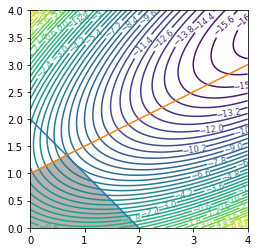

In [60]:
import matplotlib.pyplot as plt
import numpy as np


d = np.linspace(0,4,1000)
x1,x2 = np.meshgrid(d,d)

plt.imshow( (( (x1 + x2) <= 2) & ((-x1 + 2*x2) <= 2) & (x1>=0) & (x2>=0) ).astype(int) , 
                extent=(x1.min(),x2.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)

x1_ = np.linspace(0,4,500)
x2_1 = 2 - x1_ 
x2_2 = (2 + x1_)/2

z = x1**2 + 2*(x2**2) - 2*x1 - 6*x2 - 2*x1*x2 

cs = plt.contour(x1,x2,z,levels=47)
plt.plot(x1_,x2_1, label=r'$x1+x2\leq2$')
plt.plot(x1_,x2_2, label=r'$-x1+2x2\leq2$')
plt.clabel(cs,inline=True, fontsize='smaller')
plt.xlim(0,4)
plt.ylim(0,4)

plt.show()

b) Implement the active set method for quadratic programs (Algo 16.3 in Nocedal and Wright(2006)).

In [56]:

def create_KKT_Matrix(G,A_ne,b_ne,c,active_indices,point):
    
    KKT_matrix = np.zeros((G.shape[0]+len(active_indices),G.shape[1]+len(active_indices)))
    KKT_matrix[:G.shape[0],:G.shape[1]] = G.copy()
    KKT_matrix[:G.shape[0],G.shape[1]:] = A_ne[active_indices].T
    KKT_matrix[G.shape[0]:,:G.shape[1]] = A_ne[active_indices]
    
    rhs = np.zeros((c.shape[0]+b_ne[active_indices].shape[0],1))
    Gx_plus_c = np.matmul(G,point) + c
 
    Ax_minus_b  = np.matmul(A_ne[active_indices],point) - b_ne[active_indices]
    rhs[:c.shape[0],:] = Gx_plus_c
    rhs[c.shape[0]:,:] = Ax_minus_b
    
    return KKT_matrix,rhs

def compute_step_length(p,A_ne,b_ne,active_indices,current_point):
    step_length = 1.0

    for i in range(A_ne.shape[0]):
        if i not in active_indices:
            if (np.all(np.matmul(A_ne[i,:],p) < 0)):
                numerator = b_ne[i,0] - np.matmul(A_ne[i,:],current_point)
                denominator = np.matmul(A_ne[i,:],p)
                #print("Numerator = " + str(numerator))
                #print("Denominator = " + str(denominator))
                step = float(numerator/denominator)
                step_length = min(step,step_length)
    
    return step_length


def active_set_method(G,c,A_ne,b_ne,initial_point):

    #  A_ne , b_ne , H , initial_point

    current_point = initial_point.copy()
    reached_new_point = True
    active_indices = []
    #print(active_indices)
    iterations = 0
    while True:
        if reached_new_point:
            Ax =  np.matmul(A_ne,current_point)
            Ax_diff = (Ax - b_ne).squeeze(1)
            active_indices = np.where(Ax_diff==0)[0].tolist()
        
        mat = create_KKT_Matrix(G,A_ne,b_ne,c,active_indices,current_point)
        sol_vector = np.linalg.solve(mat[0],mat[1])
        
        #print(sol_vector)
        
        p = sol_vector[:G.shape[0],:]
        lambda_ = sol_vector[G.shape[0]:,:]
    
        #print("current_point = " + str(current_point))
        #print("increment = " + str(p))
        #print("lambda = " + str(lambda_))
        
        if ( np.all(np.isclose(p,np.zeros((p.shape[0],p.shape[1]))))):
            
            reached_new_point=False
            if np.all(lambda_>=0):
                return iterations,current_point
            else:
                rm_constraint_idx = int(np.argmin(lambda_,axis=0))
                del active_indices[rm_constraint_idx]
        else:
            alpha = compute_step_length(-p,A_ne,b_ne,active_indices,current_point)  
            #print("Alpha value =" + str(alpha) )
  
            new_point = current_point + alpha*(-p)
            current_point = new_point
            reached_new_point=True
        #print("----------")
        iterations+=1


c) Choose  three  initial  starting  points:  
- one  in  the  interior  of  the  feasible  region
- one  at the vertex 
- one at a non-vertex point on the boundary of the feasible region.

Comment on the convergence properties

In [57]:
G = np.array([[2,-2],[-2,4]])
c = np.array([[-2],[-6]])
A_ne = np.array([[-1,-1],[1,-2]])
b_ne = np.array([[-2],[-2]])
initial_point = np.array([[0.5],[0.5]])

it, sol = active_set_method(G,c,A_ne,b_ne,initial_point)
sol

array([[0.8],
       [1.2]])

d) Use CVXOPT and solve the above QP. What algorithm does CVXOPT use to solve QP? Understand and comment on your findings.

In [19]:
from cvxopt import matrix, solvers

P = matrix([[2.0,-2.0],[-2.0,4.0]])
q = matrix([-2.0,-6.0])
G = matrix([[1.0,1.0],[-1.0,2.0]])
h = matrix([2.0,2.0])

solution = solvers.qp(P,q,G,h)
solution

     pcost       dcost       gap    pres   dres
 0: -8.4082e+00 -1.4514e+00  9e+00  1e+00  8e-01
 1: -4.3448e+00 -5.4301e+00  1e+00  1e-16  6e-16
 2: -4.8946e+00 -4.9082e+00  1e-02  1e-16  0e+00
 3: -4.8999e+00 -4.9001e+00  1e-04  4e-17  2e-16
 4: -4.9000e+00 -4.9000e+00  1e-06  2e-16  2e-16
Optimal solution found.


{'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <2x1 matrix, tc='d'>,
 'z': <2x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.3530627047054012e-06,
 'relative gap': 2.761352760593931e-07,
 'primal objective': -4.899999464082869,
 'dual objective': -4.900000817145574,
 'primal infeasibility': 2.3551386880256624e-16,
 'dual infeasibility': 1.570092458683775e-16,
 'primal slack': 2.435986776508516e-07,
 'dual slack': 3.8911692089051155e-07,
 'iterations': 4}